In [184]:
import pandas as pd
import numpy as np

In [149]:
car=pd.read_csv(r'https://raw.githubusercontent.com/rajtilakls2510/car_price_predictor/master/quikr_car.csv')

In [150]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


# Quality 

- year have so many non year values
- year have type object not integer
- price have Ask for price
- Price object to integer
- kms_driven has kms with integers
- kms_driven object to int
- kms_driven has nan values
- fuel_type have nan values
- keep first three words of name

# Cleaning

In [151]:
backup=car.copy()

In [152]:
car=car[car['year'].str.isnumeric()]

In [153]:
car['year']=car['year'].astype(int)

In [154]:
car=car[car['Price']!="Ask For Price"]

In [155]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [156]:
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [157]:
car=car[car['kms_driven'].str.isnumeric()]

In [158]:
car['kms_driven']=car['kms_driven'].astype(int)

In [159]:
car=car[~car['fuel_type'].isna()]

In [160]:
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [161]:
car=car.reset_index(drop=True)

In [162]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [163]:
car[car['Price']>6000000]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [164]:
car=car[car['Price']<6000000].reset_index(drop=True)

In [165]:
car.to_csv('Cleaned Car.csv')

In [33]:
import seaborn as sns

### Checking relationship of kms_driven with Price

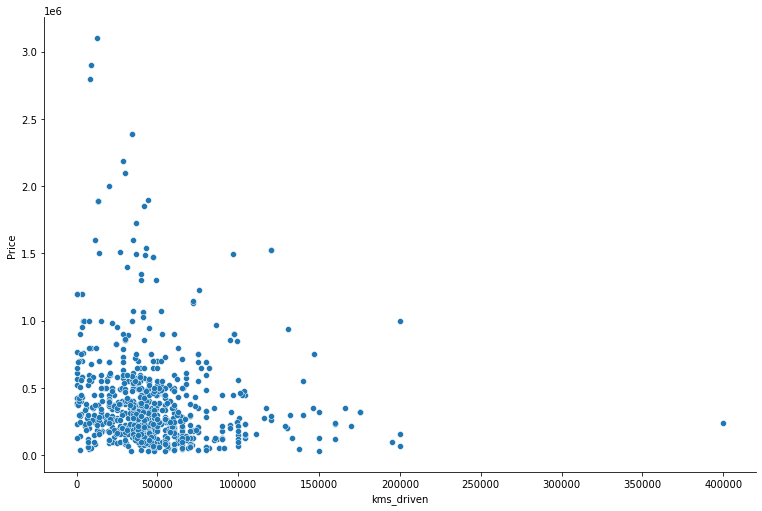

In [34]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Relationship of Price with FuelType, Year and Company mixed

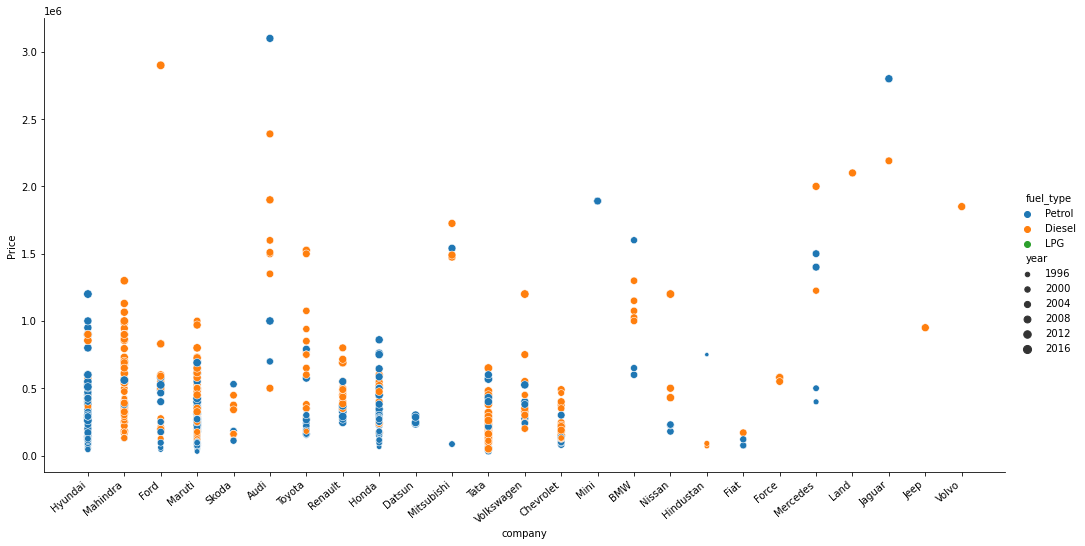

In [35]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')


# Model

### Extracting Training Data

In [166]:

X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']


### Applying Train Test Split

In [167]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [168]:
#technique for evaluating the performance of a machine learning algorithm
from sklearn.linear_model import LinearRegression 


#R-squared is a goodness-of-fit measure for linear regression models
from sklearn.metrics import r2_score 

#one hot encoding is a representation of categorical variables as binary vectors
from sklearn.preprocessing import OneHotEncoder


from sklearn.compose import make_column_transformer


from sklearn.pipeline import make_pipeline

### Creating an OneHotEncoder object to contain all the posible categories

In [169]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

### Creating a column transformer to transform categorical columns

In [170]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [171]:
lr=LinearRegression()

In [172]:
pipe=make_pipeline(column_trans,lr)

In [173]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [177]:
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7288905354875668

In [186]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [187]:
np.argmax(scores)

655

In [188]:

scores[np.argmax(scores)]

0.9200782884083312

In [189]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9200782884083312

In [192]:
import pickle

In [195]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [200]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([416095.02625041])